In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE=224
BATCH_SIZE=32
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=train_datagen.flow_from_directory(
 '/content/drive/MyDrive/Intern/Sara/sangareshwaripic',
 target_size=(IMG_SIZE,IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='categorical',
 subset='training'
)


Found 96 images belonging to 1 classes.


In [3]:
val_generator=train_datagen.flow_from_directory(
 '/content/drive/MyDrive/Intern/Sara/sangareshwaripic',
 target_size=(IMG_SIZE,IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='categorical',
 subset='validation'
)

Found 24 images belonging to 1 classes.


In [9]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("class indies:",class_indices)
print("class names:",class_names)
num_classes = len(class_names)
model=keras.Sequential([
 layers.Conv2D(32,
(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64,(3,3),activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(128,(3,3),activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(128,activation='relu'),
 layers.Dense(num_classes,activation='softmax')])

class indies: {'output': 0}
class names: ['output']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [12]:
model.save('/content/drive/MyDrive/Intern/Sara/sangareshwaripic/s5.keras')

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/Intern/Sara/sangareshwaripic/s5.keras')
print("Model Loaded")

Model Loaded


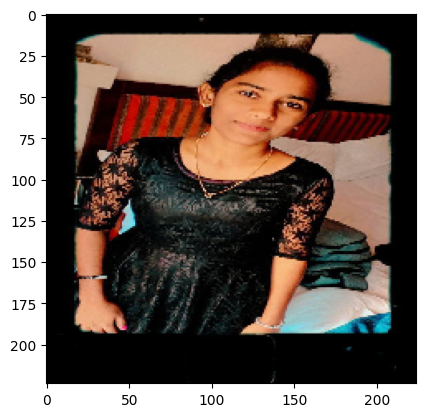

In [19]:
test_image_path="/content/drive/MyDrive/Intern/Sara/sangareshwaripic/s5.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()